In [1]:
import sys
from google.colab import drive

drive.mount('/content/drive')
sys.path.append(r"/content/drive/MyDrive/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install -U opencv-python
! pip install colab-xterm
! pip install imutils

In [3]:
# import the necessary packages
from imutils import paths
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from loader_util.preprocessing import (ImageToArrayPreprocessor,
                                       AspectAwarePreprocessor,
                                       MeanPreprocessor)

from loader_util.datasets import SimpleDatasetLoader
from loader_util.nn.conv import MiniVGGNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [4]:
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
args = {
    "dataset": r"/content/drive/MyDrive/Colab Notebooks/ImageDataset/book2/flowers17"
}

In [6]:
print(f"[INFO] loading images......")
image_paths = list(paths.list_images(args["dataset"]))
class_names = [pt.split(os.path.sep)[-2] for pt in image_paths]
class_names = list(np.unique(class_names))
print(f"[INFO] found a total of {len(class_names)} classes with {len(image_paths)} images......")

[INFO] loading images......
[INFO] found a total of 17 classes with 1360 images......


In [7]:
# construct the preprocessors
aap = AspectAwarePreprocessor(width=64, height=64)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
data, labels = sdl.load(image_paths, verbose=500)
data = data.astype("float") / 255.0
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.25, random_state=42)

[INFO] processed 500/1360
[INFO] processed 1000/1360


In [8]:
# encode the labels numerically
lb = LabelBinarizer()
trainy = lb.fit_transform(trainy)
testy = lb.transform(testy)

In [9]:
# construct the image generator
aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode="nearest")

In [10]:
# compile the model
print(f"[INFO] compiling the model......")
opt = SGD(learning_rate=0.05)
model = MiniVGGNet.build(width=64,
                         height=64,
                         depth=3,
                         classes=len(class_names))
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

[INFO] compiling the model......


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
print(f"[INFO] training the network......")
BATCH_SIZE = 32
EPOCHS = 100
H = model.fit(aug.flow(trainx, trainy, batch_size=BATCH_SIZE),
              validation_data=(testx, testy),
              steps_per_epoch=len(trainx) // BATCH_SIZE,
              epochs=EPOCHS,
              verbose=1)

[INFO] training the network......


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.1533 - loss: 3.8404 - val_accuracy: 0.1912 - val_loss: 3.2734
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2188 - loss: 3.0164 - val_accuracy: 0.1647 - val_loss: 3.2713
Epoch 3/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.3670 - loss: 2.3180 - val_accuracy: 0.2676 - val_loss: 2.3981
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3750 - loss: 2.2088 - val_accuracy: 0.2471 - val_loss: 2.4259
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3807 - loss: 2.0841 - val_accuracy: 0.1882 - val_loss: 3.7025
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 2.0812 - val_accuracy: 0.2118 - val_loss: 3.4251
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4441 - loss: 1.9440 - val_accuracy: 0.2324 - val_loss: 2.7340
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 1.5349 - val_accuracy: 0.2941 - val_loss: 2.5643
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5166 - loss: 1.5733 - val_accuracy: 0.2882 - val_loss: 2.4745
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 1.8851 - val_accuracy: 0.2441 - val_loss

[INFO] evaluating network...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

    bluebell       0.77      0.85      0.81        20
   buttercup       0.72      0.90      0.80        20
   coltsfoot       0.48      0.69      0.56        16
     cowslip       0.47      0.74      0.57        19
      crocus       0.75      0.60      0.67        15
    daffodil       0.50      0.30      0.38        20
       daisy       0.85      0.74      0.79        23
   dandelion       0.82      0.52      0.64        27
  fritillary       0.89      0.89      0.89        19
        iris       1.00      0.67      0.80        21
  lilyvalley       0.59      0.72      0.65        18
       pansy       1.00      0.62      0.77        16
    snowdrop       0.47      0.68      0.56        22
   sunflower       1.00      0.91      0.95        23
   tigerlily       0.85      0.94      0.89        18
       tulip       0.36      0.20      0.26        20
  windflower

Text(0.5, 0, 'Epochs')

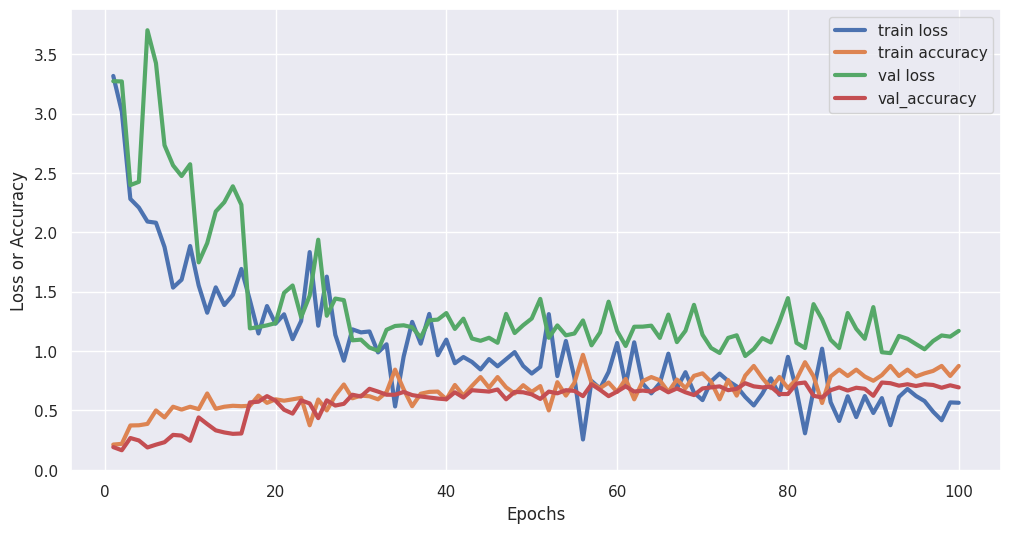

In [16]:
print("[INFO] evaluating network...")
predictions = model.predict(testx, batch_size=BATCH_SIZE)
print(classification_report(testy.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=class_names))

# plot the performance
epochs = range(1, EPOCHS + 1)
loss = H.history['loss']
accuracy = H.history['accuracy']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_accuracy']
plot_df = pd.DataFrame(data=np.c_[epochs, loss, accuracy, val_loss, val_accuracy],
                       columns=['epochs', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')

